In [1]:
import os
import sys

import pandas as pd

In [3]:
nb_dir = '/data/parastou/RNAdeg/scripts/'
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [4]:
deg1 = ['dh1', 'dg1']
deg2 = ['tlh1', 'SPAC212.10']
non_degraded = ['SPAC212.09c', 'SPNCRNA.70', 'SPAC212.08c', 'SPAC212.07c', 'SPAC212.12', 'SPAC212.06c',
                'SPAC212.04c', 'SPAC212.03', 'SPAC212.02', 'SPAC212.01c', 'SPAC977.01', 'SPAC977.18',
                'SPAC977.02', 'SPAC977.03', 'SPAC977.04', 'SPAC212.05c', 'MAT2', 'MAT3', 'MAT1']

In [5]:
het_genes = deg1 + deg2 + non_degraded

---

In [6]:
out_dir = '/data/parastou/RNAdeg/plots/'

---

In [7]:
# Load Transcription Efficiency data
te_df = pd.read_csv('/data/parastou/RNAdeg/results/RipChip/xp_data/l2_delta_te_0shift.csv', sep='\t')
te_df = te_df[te_df['gene-name'].isin(het_genes)]

In [8]:
# Load PolII ChIP Occupancy data
po_df = pd.read_csv('/data/parastou/RNAdeg/results/RipChip/xp_data/l2_polIIChIP_change_wt_0shift.csv', sep='\t')
po_df = po_df[po_df['gene-name'].isin(het_genes)]
po_df.columns = ['510' if x == '591' else x for x in list(po_df.columns)]

----

In [9]:
import numpy as np

In [10]:
from sklearn.manifold import TSNE

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
names = ['80', '638', '301', '324', '491', '302', '504', '530', '510']
labels = ['clr4Δ', 'ago1Δ', 'swi6Δ', 'chp2Δ', 'mit1Δ' ,'clr3Δ','rrp6Δ', 'exo2Δ', 'caf1Δ']

In [13]:
color_map = {'80':'indianred', '638':'blueviolet', '301':'lightcoral', '324':'orangered', 
             '491':'tomato', '302':'coral', '504':'green', '530':'darkolivegreen', 
             '510':'rebeccapurple', 'WT':'gray'}

def tsne_plot(df, names, labels=None, random_state=1, color=None, title='', outpath=None, **kwargs):
    
    df = df.fillna(0)
    matrix = df[names].values.T
    transformer = TSNE(random_state=random_state, perplexity=2)#, early_exaggeration=6)
    tsne = transformer.fit_transform(matrix)
    X = [i for i,j in tsne]
    Y = [j for i,j in tsne]
    
    if not labels:
        labels = names
        
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.spines['top'].set_linewidth(3)
    ax.spines['right'].set_linewidth(3)
    ax.spines['bottom'].set_linewidth(3)
    ax.spines['left'].set_linewidth(3)
    
    ax.set_ylabel('Component 2', fontsize=40, labelpad=20)
    ax.set_xlabel('Component 1', fontsize=40, labelpad=20)
    
    plt.xticks(fontsize=35, rotation=45)
    plt.yticks(fontsize=35)

    plt.suptitle(title, fontsize=20, y=1)
    for idx in range(0, len(names)):
        # ax.annotate(labels[idx], (X[idx], Y[idx]), fontsize=25, textcoords="offset points"
        ax.annotate('', (X[idx], Y[idx]), fontsize=25, textcoords="offset points"
                    , xytext=(10,10), ha='right', style='italic')
        plt.plot(X[idx], Y[idx], 'o', markersize=30, c=color_map[names[idx]])
    if outpath:
        plt.savefig(outpath, bbox_inches='tight')
        plt.savefig(outpath.split('.')[0]+'.pdf', format='pdf', bbox_inches='tight')
    plt.show()

---

## Transcription efficiency fold change

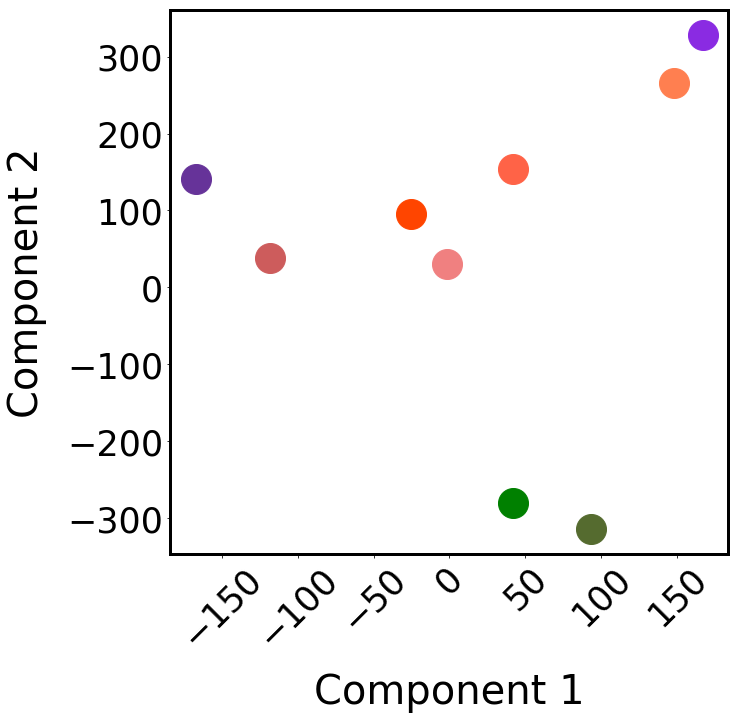

In [14]:
tsne_plot(te_df, names, labels=labels,
          title='',
         outpath=os.path.join(out_dir, 'tsne_transcription_efficiency_foldchange.png'))

----

## PolII occupancy fold change

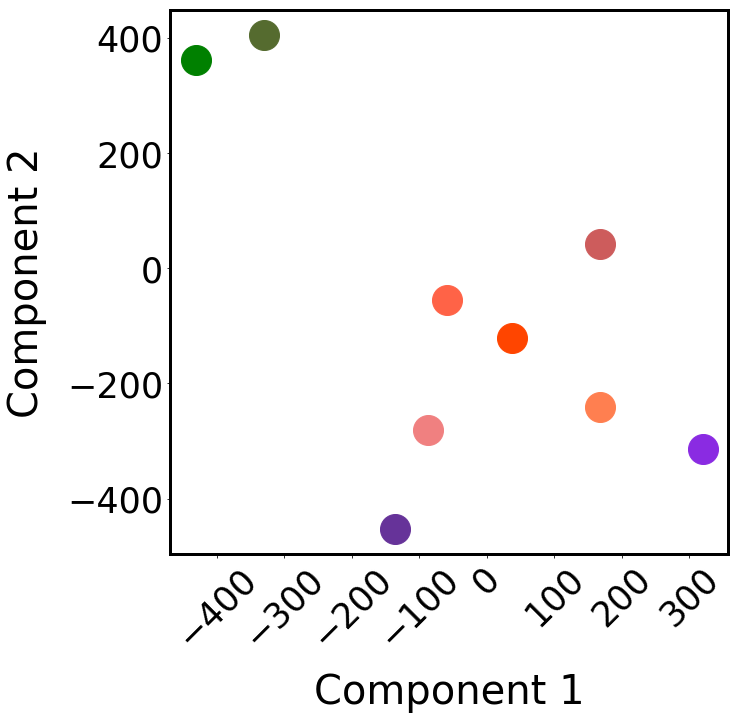

In [15]:
tsne_plot(po_df, names, labels=labels,
          title='',
         outpath=os.path.join(out_dir, 'tsne_polII_occupancy_foldchange.png'))

---

In [16]:
total = pd.concat([te_df, po_df])

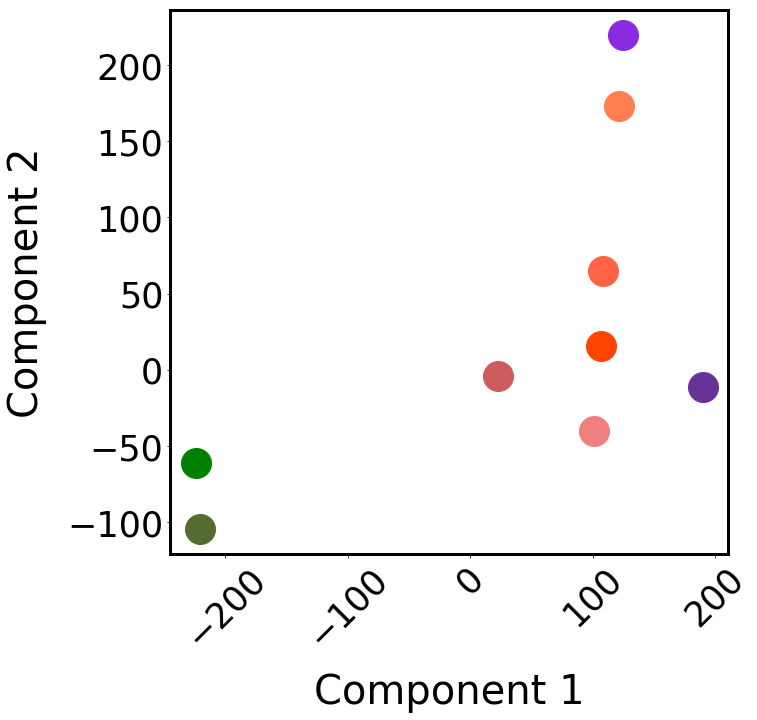

In [17]:
tsne_plot(total, names, labels=labels,
         title='',
         outpath=os.path.join(out_dir, 'tsne_te_po_foldchange.png'))